# Symmetric LU Factorization

In [14]:
import numpy as np
import matplotlib.pyplot as plt

###### Convert naive LU Factorization to construct an $A = LDL^T$ factorization. Recall:
* naive LU factorization is adequate because the matrix is assumed to be symmetric positive definite
* $L$ is the lower triangular matrix from LU factorization
* $D$=diag($U$)

In [2]:
def myLDL(A):
    # A must be a square matrix for LDL factorization.
    # If the user wants to factor a nonsquare matrix, they can use QR factorization for example
    if A.shape[0] != A.shape[1]:
        raise Exception('m = {} not equal to n = {}. A must be a square matrix for LU factorization, resize or try QR.'.format(A.shape[0],A.shape[1]))
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)
    for k in range(n):
        # Perform Elimination
        L[k+1:,k] = U[k+1:,k]/U[k,k]
        U[k+1:,k] = 0.
        for j in range(k+1,n):
            U[k+1:,j] -= L[k+1:,k]*U[k,j]
    D = np.diag(np.diag(U))
    return L, D

###### Unit Test the LDL Algorithm
* Input random matrices of sizes $4\times4$ to $100\times100$
* Compute the residual in each case
* Output an array of the order of magnitude for each residual (should be roughly -13 give or take a couple of integers)

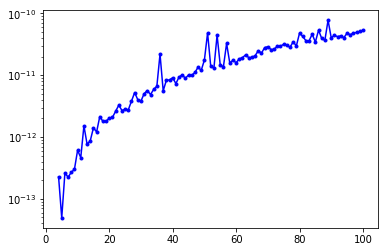

In [15]:
err = []
for n in range(4,101):
    A = np.random.randn(n,n)*10 + np.eye(n)*10
    A = np.dot(A,A.T)
    L, D = myLDL(A)
    err.append(np.linalg.norm(A - np.dot(L.dot(D),L.T)))
plt.semilogy(np.arange(4,101),err,'b.-');

###### Cholesky factorization $A = GG^T$ is simply and $LDL^T$ factorization with $G = L\sqrt{D}$.

In [5]:
def myCholesky(A):
    L, D = myLDL(A)
    if any(np.diag(D) < 0):
        raise Exception('A must be positive definite.')
    else:
        return L.dot(np.sqrt(D))

###### Unit Test the Cholesky Algorithm
* Input random matrices of sizes $4\times4$ to $100\times100$
* Compute the residual in each case
* Output an array of the order of magnitude for each residual (should be roughly -13 give or take a couple of integers)

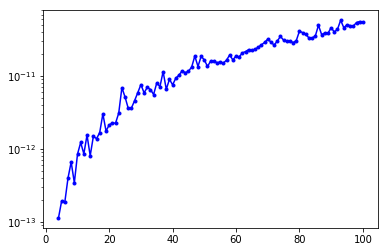

In [16]:
err = []
for n in range(4,101):
    A = np.random.randn(n,n)*10 + np.eye(n)*10
    A = np.dot(A,A.T)
    L = myCholesky(A)
    err.append(np.linalg.norm(A - L.dot(L.T)))
plt.semilogy(np.arange(4,101),err,'b.-');

###### How does myCholesky compare to NumPy's Cholesky factorization?

In [7]:
Lnp = np.linalg.cholesky(A)
np.linalg.norm(L-Lnp)

3.665018538900075e-12

In [8]:
%timeit Lnp = np.linalg.cholesky(A)

87.2 µs ± 765 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit L = myCholesky(A)

35.8 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


###### Questions regarding efficiency.
* Is $U$ necessary?
* Is $L$ necessary?
* Could we create a Cholesky factorization with only $U$ or only $L$?

-[back to top](#Symmetric-LU-Factorization)